# Facial Landmark Detection with Dlib

---
### Imports and Helper-functions

In [1]:
%pip install dlib

     ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
     --------------------------------------- 0.1/11.8 MB 787.7 kB/s eta 0:00:15
     - -------------------------------------- 0.4/11.8 MB 2.9 MB/s eta 0:00:04
     -- ------------------------------------- 0.7/11.8 MB 4.1 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/11.8 MB 4.9 MB/s eta 0:00:03
     ---- ----------------------------------- 1.4/11.8 MB 5.3 MB/s eta 0:00:02
     ------ --------------------------------- 1.8/11.8 MB 5.6 MB/s eta 0:00:02
     ------- -------------------------------- 2.1/11.8 MB 5.8 MB/s eta 0:00:02
     -------- ------------------------------- 2.5/11.8 MB 6.0 MB/s eta 0:00:02
     --------- ------------------------------ 2.8/11.8 MB 6.1 MB/s eta 0:00:02
     ---------- ----------------------------- 3.1/11.8 MB 6.3 MB/s eta 0:00:02
     ---------- ----------------------------- 3.2/11.8 MB 6.1 MB/

In [1]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import cv2

import dlib

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

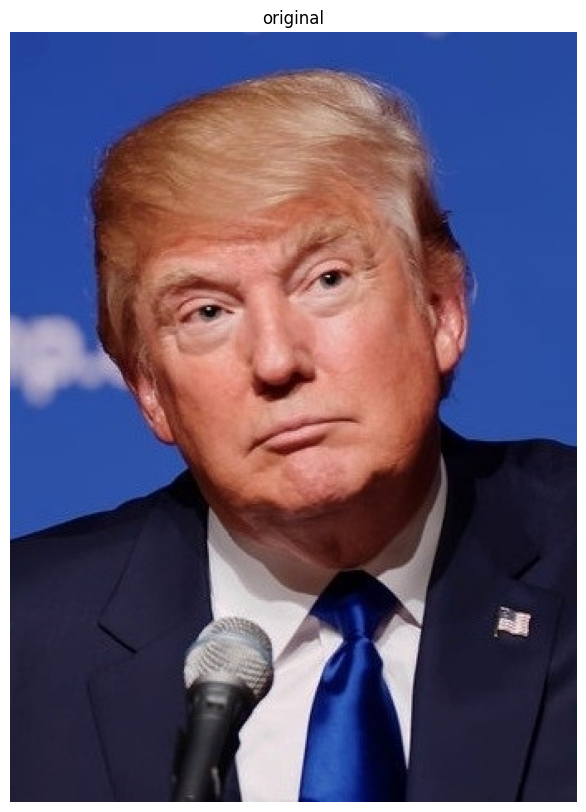

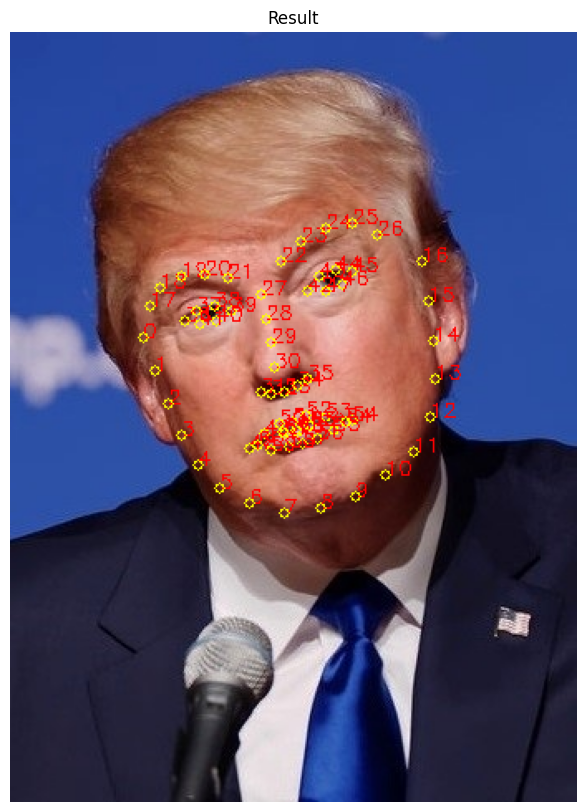

In [10]:
PREDICTOR_PATH = "../../res/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(PREDICTOR_PATH)
detector = dlib.get_frontal_face_detector()

class TooManyFaces(Exception):
    pass

class NoFaces(Exception):
    pass

def get_landmarks(im):
    rects = detector(im, 1)

    if len(rects) > 1:
        raise TooManyFaces
    if len(rects) == 0:
        raise NoFaces

    return np.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])

def annotate_landmarks(im, landmarks):
    im = im.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0, 0], point[0, 1])
        cv2.putText(im, str(idx), pos,
                    fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                    fontScale=0.4,
                    
                    color=(0, 0, 255))
        cv2.circle(im, pos, 3, color=(0, 255, 255))
    return im

image = cv2.imread('../../res/img/course_img/Trump.jpg')
imshow(image, "original")
landmarks = get_landmarks(image)
image_with_landmarks = annotate_landmarks(image, landmarks)
imshow(image_with_landmarks, 'Result')

---